In [1]:
# import pandas as pd
# import numpy as np
# import math
import matplotlib.pyplot as plt
# import matplotlib
# from lmfit import models
from utils.scopeutil import *
from utils.OOMFormatter import OOMFormatter
from models.T1_simple_model import *
from scipy import stats 

In [2]:
def process_T1_results(stof, verhouding, trim_tail=0, v=False):
    My_delay_pairs = []
    for (delay, df) in get_df_of_all_delays(
            stof,
            verhouding,
            T=T1,
            signal_index=SI_SIGNAL):

        My = My_for_T1_df(df, v)

        # we willen de absolute waarde van alles
        # Er kunnen negatieve waardes zijn ivm meetonzekerheid, deze worden dus weggehaald
        My = max(0, My)

        My_delay_pairs.append((My, delay))

    M0 = My_delay_pairs[len(My_delay_pairs) - 1][0]

    # eerste drie elementen weghalen omdat die niet goed in ons onderzoek passen
    # Bij de eerste 4 elementen hebben we zo dicht gemeten op pi dat het geen aangroei tijd had
    # De meetpunten in dat gebied zijn weggehaald
    My_delay_pairs = My_delay_pairs[trim_tail:]

    fit_T1 = model_T1.fit([My for (My, delay) in My_delay_pairs], t=[delay for (My, delay) in My_delay_pairs], M0=M0, T1=1000, weights=np.array([1 for _ in range(len(My_delay_pairs))]))
    fit_T1.plot()

    pvalue = 1 - stats.chi2.cdf(fit_T1.chisqr, fit_T1.nfree)
    print(f"De p waarde is {pvalue:.9f}.")

    fit_T1.fit_report()

De p waarde is 0.655178494.


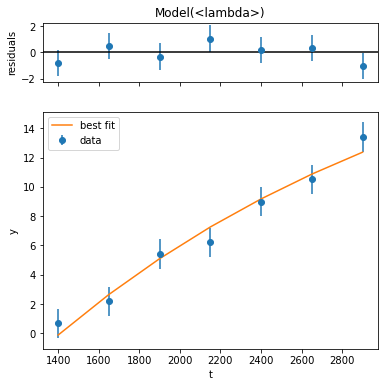

In [3]:
process_T1_results(STOF_KOPERCHLORIDE_ACETOON, "1_1", trim_tail=4)

De p waarde is 0.007043209.


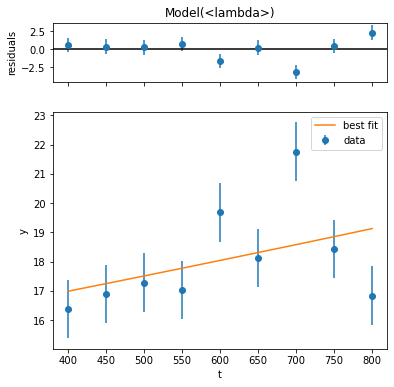

In [4]:
process_T1_results(STOF_KOPERCHLORIDE_A, "1_0")

De p waarde is 0.000000945.
De p waarde is 0.000032362.


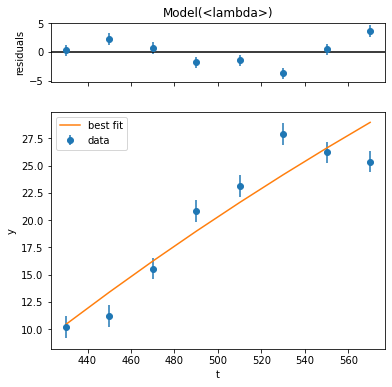

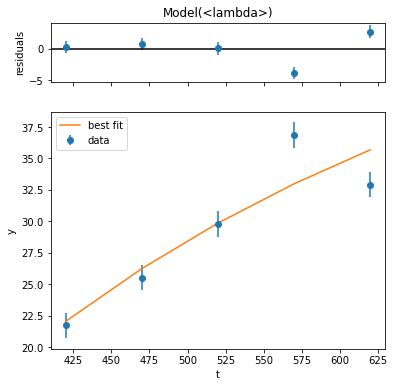

In [5]:
process_T1_results(STOF_KOPERCHLORIDE_B, "1_0")

process_T1_results(STOF_KOPERCHLORIDE_B, "1_1")

De p waarde is 0.924765920.


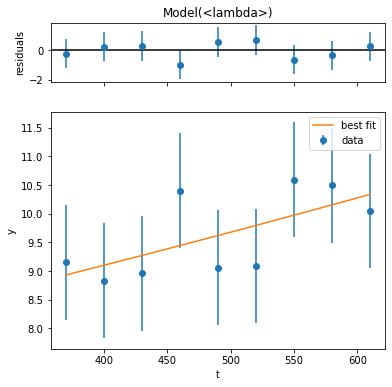

In [6]:
process_T1_results(STOF_ACETOON, "1_0")
